In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.utils import to_categorical
from tensorflow.keras import datasets

In [2]:
(X_train, Y_train), (X_test, Y_test) = datasets.fashion_mnist.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [3]:
label = ['T-shirt', 'trouser', 'pullover', 'dress', 'coat',
         'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

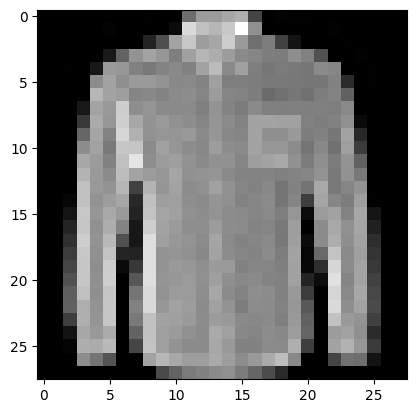

6
[[  0   0   0   0   0   0   0   0   1   0   0 109 155 155 167 176  68   0
    2   1   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   3   0   0   0   0  11 218 192 182 200 255 144   0
    0   0   0   0   2   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  35  79 163 199 157 167 205 154 111 125
   66  19   0   0   0   1   0   0   0   0]
 [  0   0   0   0   0  25  99 148 163 151 126 161 182 173 157 138 134 126
  125 142 129  81   0   0   2   0   0   0]
 [  0   0   1   0  23 154 151 129 122 132 137 130 162 187 137 159 126 119
  123 121 119 138 134   0   0   1   0   0]
 [  0   0   0   0 140 164 143 154 154 147 136 137 132 160 126 126 125 121
  122 120 119 119 130  42   0   1   0   0]
 [  0   0   0   0 182 164 158 133 136 132 138 141 133 156 133 132 125 107
  113 119 113 125 131  98   0   0   0   0]
 [  0   0   0  24 163 153 205 142 149 138 138 138 128 148 132 123 138 128
  127 128 127 128 126 137   0   0   0   0]
 [  0   0   0  57 170 150 207 167 146 154 145 141 133 149 139 

In [4]:
my_sample = np.random.randint(60000)
plt.imshow(X_train[my_sample], cmap='gray')
plt.show()
print(Y_train[my_sample])
print(X_train[my_sample])

In [5]:
y_train = to_categorical(Y_train)
y_test = to_categorical(Y_test)
print(Y_train[5000])
print(y_train[5000])

4
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [6]:
x_train = X_train.reshape(-1, 28 * 28)
x_test = X_test.reshape(-1, 28 * 28)
x_train = x_train / 255
x_test = x_test / 255
print(x_train.shape)

(60000, 784)


In [7]:
model = Sequential()
model.add(Dense(128, input_dim=784, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
opt = Adam(learning_rate=0.01)
model.compile(opt, loss='categorical_crossentropy',
              metrics=['accuracy'])
fit_hist = model.fit(x_train, y_train, batch_size=256,
          epochs=15, validation_split=0.2, verbose=1)

Epoch 1/15
188/188 [==============================] - 4s 14ms/step - loss: 0.5696 - accuracy: 0.7960 - val_loss: 0.4292 - val_accuracy: 0.8439
Epoch 2/15
188/188 [==============================] - 2s 9ms/step - loss: 0.3973 - accuracy: 0.8557 - val_loss: 0.3960 - val_accuracy: 0.8573
Epoch 3/15
188/188 [==============================] - 2s 9ms/step - loss: 0.3598 - accuracy: 0.8667 - val_loss: 0.3593 - val_accuracy: 0.8682
Epoch 4/15
188/188 [==============================] - 2s 9ms/step - loss: 0.3347 - accuracy: 0.8788 - val_loss: 0.3553 - val_accuracy: 0.8742
Epoch 5/15
188/188 [==============================] - 2s 9ms/step - loss: 0.3233 - accuracy: 0.8802 - val_loss: 0.4279 - val_accuracy: 0.8555
Epoch 6/15
188/188 [==============================] - 1s 8ms/step - loss: 0.3128 - accuracy: 0.8837 - val_loss: 0.3829 - val_accuracy: 0.8684
Epoch 7/15
188/188 [==============================] - 2s 9ms/step - loss: 0.3053 - accuracy: 0.8848 - val_loss: 0.3574 - val_accuracy: 0.8721
Epoch

In [9]:
score = model.evaluate(x_test, y_test, verbose=0)
print('accuracy', score[1])

accuracy 0.8646000027656555


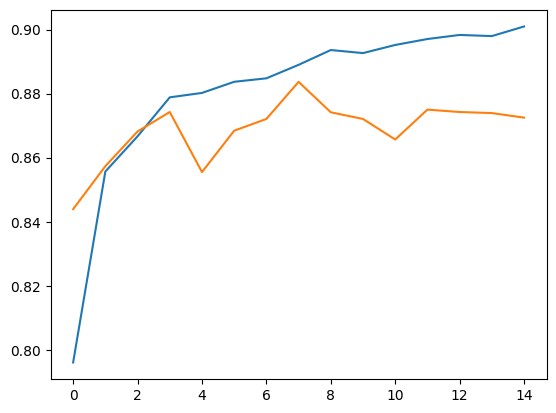

In [10]:
plt.plot(fit_hist.history['accuracy'])
plt.plot(fit_hist.history['val_accuracy'])
plt.show()

shirt
1/1 [==============================] - 0s 20ms/step
[[1.1697842e-05 2.9559319e-10 8.4671145e-03 5.4858191e-07 9.5746505e-01
  2.1042338e-13 3.4055345e-02 3.3694107e-14 2.4907720e-07 8.1628796e-14]]
coat


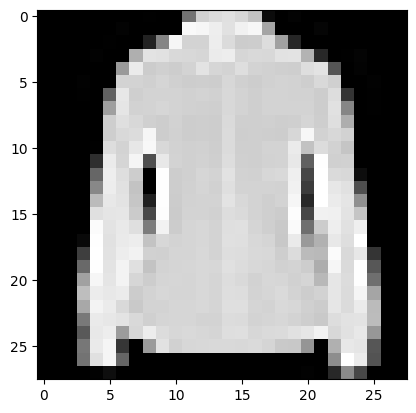

In [24]:
my_sample = np.random.randint(10000)
plt.imshow(X_test[my_sample], cmap='gray')
print(label[Y_test[my_sample]])
pred = model.predict(x_test[my_sample].reshape(-1, 784))
print(pred)
print(label[np.argmax(pred)])